#### Notebook setup and imports

In addition to matplotlib and numpy, we will use the `dysts` library for some utilities, and the `degas` library for custom plotting.

    pip install dysts degas



In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# Turn on autoreload
%load_ext autoreload
%autoreload 2

from scripts.utils import smape

def smape_rolling(ts1, ts2):
    """Return the smape versus time for two time series."""
    n = min(ts1.shape[0], ts2.shape[0])
    all_smape = list()
    for i in range(n):
        smape_val = smape(ts1[:i], ts2[:i])
        all_smape.append(smape_val)
    return np.array(all_smape)


# Plot chronos benchmark results

# Properties across many models

#### First, let's load all of the zero-shot forecasting results. This will take a few minutes

In [70]:
from dysts.base import get_attractor_list
import os

model_sizes = ["tiny", "mini", "small", "base", "large"]
all_traces  = dict()
granularity = 30
BASE_DIR = "./zero-shot/chronos_benchmarks_context_512_granularity_30/"

equation_names = get_attractor_list()
for equation_name in equation_names:
# for equation_name in ["Lorenz", "Aizawa", "Arneodo", "ArnoldBeltrami", "AnishchenkoAstakhov", "Rossler"]:
    
    all_traces[equation_name] = dict()
    for model_size in model_sizes:
        try:
            all_traj_true = np.load(BASE_DIR + f"forecast_{equation_name}_granularity{granularity}_true_chronos.npy", allow_pickle=True)
            all_traj_forecasts = np.load(BASE_DIR + 
                f"forecast_{equation_name}_{model_size}_granularity{granularity}.npy", allow_pickle=True
            )
        except:
            print(f"Skipping {equation_name} {model_size}", flush=True)
            all_traces.pop(equation_name, None)
            continue

        # print(all_traj_true.shape, all_traj_forecasts.shape)
        
        # print(equation_name, flush=True)

        all_smape_rolling = list()
        ## Loop over all intial conditions, accounting for the fact that some predictions may not have been computed
        for traj_pred, traj_true in zip(all_traj_forecasts, all_traj_true[:len(all_traj_forecasts)]):
            all_smape = list()
            for i in range(traj_pred.shape[1]):
                smape_val = np.nanmedian(np.array([smape_rolling(item[i], traj_true[:, i]) for item in traj_pred.T]), axis=0)
                if np.all(np.isnan(smape_val)):
                    pass
                else:
                    smape_val[np.isnan(smape_val)] = 0
                all_smape.append(smape_val)
            all_smape_rolling.append(all_smape)
        all_smape_rolling = np.array(all_smape_rolling)


        ## Across replicate initial conditions, take median
        ## Across different dimensions, take mean
        all_traces[equation_name][model_size] = np.nanmedian(np.nanmean(np.copy(all_smape_rolling), axis=1), axis=0)


## Load the null data
all_null_traces = dict()
for equation_name in equation_names:
    all_null_traces[equation_name] = dict()
    try:
        all_traj_true = np.load(BASE_DIR + f"forecast_{equation_name}_granularity{granularity}_true_chronos.npy", allow_pickle=True)
        all_traj_forecasts  = all_traj_true[:, :1, :] * np.ones_like(all_traj_true[:1, :, :1])
    except:
        print(f"Skipping {equation_name} {model_size}", flush=True)

    ## Loop over all intial conditions, accounting for the fact that some predictions may not have been computed
    all_smape_rolling = list()
    for traj_pred, traj_true in zip(all_traj_forecasts, all_traj_true[:len(all_traj_forecasts)]):
        all_smape = list()
        for i in range(traj_pred.shape[1]):
            smape_val = np.nanmedian(np.array([smape_rolling(item[i], traj_true[:, i]) for item in traj_pred.T]), axis=0)
            if np.all(np.isnan(smape_val)):
                pass
            else:
                smape_val[np.isnan(smape_val)] = 0
            all_smape.append(smape_val)
        all_smape_rolling.append(all_smape)
    all_smape_rolling = np.array(all_smape_rolling)

    all_null_traces[equation_name] = np.nanmedian(np.nanmean(np.copy(all_smape_rolling), axis=1), axis=0)
        
            

/Users/william/micromamba/envs/dysts_benchmarks/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/william/micromamba/envs/dysts_benchmarks/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/var/folders/xt/9wdl4pmx26gf_qytq8_d528c0000gq/T/ipykernel_14508/4244891187.py:34: RuntimeWarning: All-NaN slice encountered
  smape_val = np.nanmedian(np.array([smape_rolling(item[i], traj_true[:, i]) for item in traj_pred.T]), axis=0)


Skipping GlycolyticOscillation tiny
Skipping GlycolyticOscillation mini
Skipping GlycolyticOscillation small
Skipping GlycolyticOscillation base
Skipping GlycolyticOscillation large
Skipping IkedaDelay tiny
Skipping IkedaDelay mini
Skipping IkedaDelay small
Skipping IkedaDelay base
Skipping IkedaDelay large
Skipping MackeyGlass tiny
Skipping MackeyGlass mini
Skipping MackeyGlass small
Skipping MackeyGlass base
Skipping MackeyGlass large
Skipping PiecewiseCircuit tiny
Skipping PiecewiseCircuit mini
Skipping PiecewiseCircuit small
Skipping PiecewiseCircuit base
Skipping PiecewiseCircuit large
Skipping ScrollDelay tiny
Skipping ScrollDelay mini
Skipping ScrollDelay small
Skipping ScrollDelay base
Skipping ScrollDelay large
Skipping SprottDelay tiny
Skipping SprottDelay mini
Skipping SprottDelay small
Skipping SprottDelay base
Skipping SprottDelay large
Skipping StickSlipOscillator tiny
Skipping StickSlipOscillator mini
Skipping StickSlipOscillator small
Skipping StickSlipOscillator base
S

IndexError: tuple index out of range

In [59]:
## Load the null data
all_null_traces = dict()
for equation_name in equation_names:
    all_null_traces[equation_name] = dict()
    try:
        all_traj_true = np.load(BASE_DIR + f"forecast_{equation_name}_granularity{granularity}_true_chronos.npy", allow_pickle=True)
        all_traj_forecasts  = all_traj_true[:, :1, :] * np.ones_like(all_traj_true[:1, :, :1])
    except:
        print(f"Skipping {equation_name} {model_size}", flush=True)

    ## Loop over all intial conditions, accounting for the fact that some predictions may not have been computed
    all_smape_rolling = list()
    for traj_pred, traj_true in zip(all_traj_forecasts, all_traj_true[:len(all_traj_forecasts)]):
        all_smape = list()
        for i in range(traj_pred.shape[1]):
            smape_val = np.nanmedian(np.array([smape_rolling(item[i], traj_true[:, i]) for item in traj_pred.T]), axis=0)
            if np.all(np.isnan(smape_val)):
                pass
            else:
                smape_val[np.isnan(smape_val)] = 0dd
            all_smape.append(smape_val)
        all_smape_rolling.append(all_smape)
    all_smape_rolling = np.array(all_smape_rolling)

    all_null_traces[equation_name] = np.nanmedian(np.nanmean(np.copy(all_smape_rolling), axis=1), axis=0)

IndexError: tuple index out of range

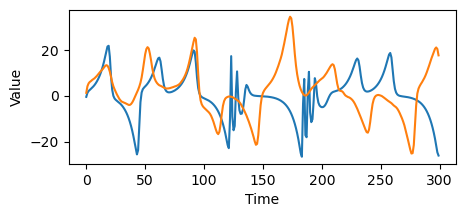

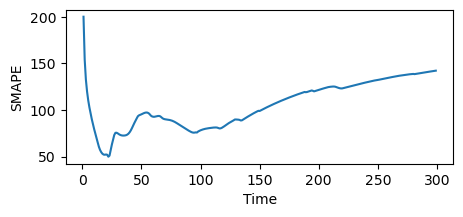

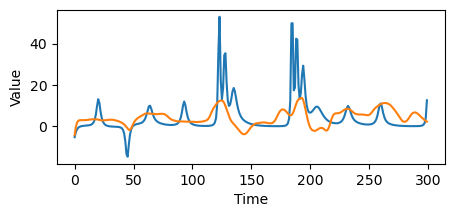

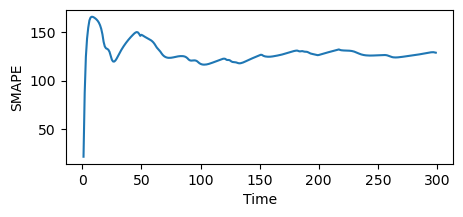

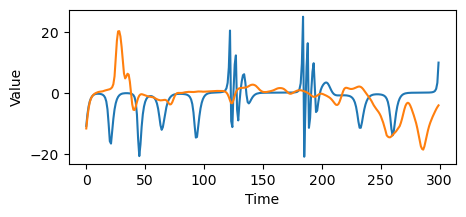

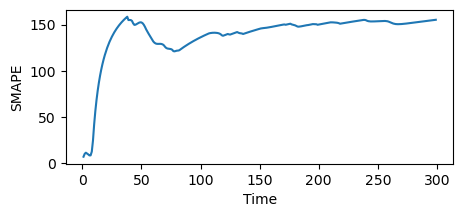

In [4]:
for i in range(3):
    traj_true, traj_pred = all_traj_true[0, :, i], all_traj_forecasts[0, :, i, 0]
    plt.figure(figsize=(5, 2))
    plt.plot(traj_true)
    plt.plot(traj_pred)
    plt.xlabel("Time")
    plt.ylabel("Value")

    plt.figure(figsize=(5, 2))
    plt.plot(smape_rolling(traj_true, traj_pred))
    plt.xlabel("Time")
    plt.ylabel("SMAPE")

#### Plot forecast results averaged across models

(array([  0,  50, 100]),
 [Text(0, 0, '0'), Text(0, 50, '50'), Text(0, 100, '100')])

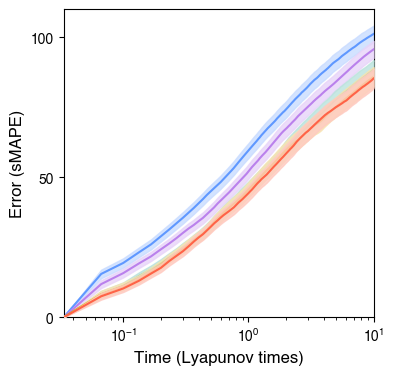

In [73]:

import degas as dg
smape_threshold = 30
all_all_vals, all_all_prediction_horizons = list(), list()
for model_size in all_traces["Aizawa"].keys():
    all_vals = list()
    all_horizons = list()
    for equation_name in all_traces.keys():

        ## Save traces
        vals = all_traces[equation_name][model_size]
        all_vals.append(vals)

        ## Save prediction horizon
        exceed_times = np.where(vals > smape_threshold)[0]
        if len(exceed_times) == 0:
            tind = len(vals)
        else:
            tind = exceed_times[0]
        all_horizons.append(tind)


    all_all_vals.append(np.array(all_vals))
    all_all_prediction_horizons.append(np.array(all_horizons))
all_all_vals = np.array(all_all_vals)
all_all_prediction_horizons = np.array(all_all_prediction_horizons)
xvals = np.arange(1, all_all_vals[0].shape[-1] + 1) / granularity

all_colors = [dg.blue,  dg.lighter(dg.purple), dg.turquoise, dg.orange,   dg.red]

# import degas as dg

plt.figure(figsize=(4, 4))
for i, model_size in enumerate(model_sizes):
    n_sys = all_all_vals.shape[1]
    mv_vals = np.mean(all_all_vals, axis=1)[i]
    std_vals = np.std(all_all_vals, axis=1)[i]

    # plt.plot(mv_vals, label=model_size)
    plt.semilogx()
    # dg.plot_err(mv_vals, std_vals / np.sqrt(n_sys) / 1.0, x=xvals, color=all_colors[i], label=model_size)
    dg.plot_err(mv_vals, std_vals / np.sqrt(n_sys) / 1.0, x=xvals, color=all_colors[i], label=model_size, zorder=10*i, fill_kwargs={"alpha": 0.8})

plt.xlabel("Time (Lyapunov times)", fontname="Helvetica", fontsize=12)
plt.ylabel("Error (sMAPE)", fontname="Helvetica", fontsize=12)
# plt.legend()
plt.xlim(np.min(xvals), np.max(xvals))
plt.ylim(0, 110)
plt.yticks([0, 50, 100])
# set font name of x-axis labels
plt.xticks(fontname="Helvetica")
plt.yticks(fontname="Helvetica")

# dg.better_savefig("./fig_resources/chronos_traces.png", dpi=300)

(array([0., 2., 4., 6.]),
 [Text(0, 0.0, '0'), Text(0, 2.0, '2'), Text(0, 4.0, '4'), Text(0, 6.0, '6')])

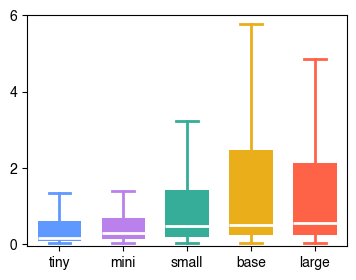

In [74]:
len(all_all_prediction_horizons)

plt.figure(figsize=(4.12, 3))

## Make a boxplot of the prediction horizons
# Use all_colors to color each box differently
# Boxes are very close together, so use a different color for each box
box = plt.boxplot(all_all_prediction_horizons.T / granularity, labels=model_sizes, patch_artist=True, showfliers=False, widths=0.34, positions=np.arange(len(model_sizes))/2)
plt.xlim(-0.25, 2.25)
plt.ylim(-0.05, 6)
for patch, color in zip(box['boxes'], all_colors):
    patch.set_facecolor(color)
    patch.set_linewidth(0)
    patch.set_edgecolor(color)

for median, color in zip(box['medians'], all_colors):
    median.set_color("w")
    median.set_linewidth(2)

for i, (cap, whisker) in enumerate(zip(box['caps'], box['whiskers'])):
    color = all_colors[i // 2]
    whisker.set_color(color)
    cap.set_color(color)
    whisker.set_linewidth(2)
    cap.set_linewidth(2)

plt.yticks([0.0, 2.0, 4.0, 6.0])
plt.xticks(fontname="Helvetica")
plt.yticks(fontname="Helvetica")

# plt.xlabel("Model Size")
# plt.ylabel("Prediction Horizon (Lyapunov times)")
# plt.title(f"Prediction Horizon for SMAPE > {smape_threshold}")


# dg.better_savefig("./fig_resources/legend.png", dpi=300)

/Users/william/micromamba/envs/dysts_benchmarks/lib/python3.12/site-packages/dysts/analysis.py:14: UserWarning: Neurokit2 must be installed before computing multiscale entropy
  warnings.warn("Neurokit2 must be installed before computing multiscale entropy")


tiny
Skipping GlycolyticOscillation tiny
Skipping IkedaDelay tiny
Skipping MackeyGlass tiny
Skipping PiecewiseCircuit tiny
Skipping ScrollDelay tiny
Skipping SprottDelay tiny
Skipping StickSlipOscillator tiny
Skipping VossDelay tiny
0.6982484140821834 0.0
mini
Skipping GlycolyticOscillation mini
Skipping IkedaDelay mini
Skipping MackeyGlass mini
Skipping PiecewiseCircuit mini
Skipping ScrollDelay mini
Skipping SprottDelay mini
Skipping StickSlipOscillator mini
Skipping VossDelay mini
0.7039925078836892 0.0
small
Skipping GlycolyticOscillation small
Skipping IkedaDelay small
Skipping MackeyGlass small
Skipping PiecewiseCircuit small
Skipping ScrollDelay small
Skipping SprottDelay small
Skipping StickSlipOscillator small
Skipping VossDelay small
0.7335878605543331 0.0
base
Skipping GlycolyticOscillation base
Skipping IkedaDelay base
Skipping MackeyGlass base
Skipping PiecewiseCircuit base
Skipping ScrollDelay base
Skipping SprottDelay base
Skipping StickSlipOscillator base
Skipping VossD

IndexError: index 4 is out of bounds for axis 0 with size 4

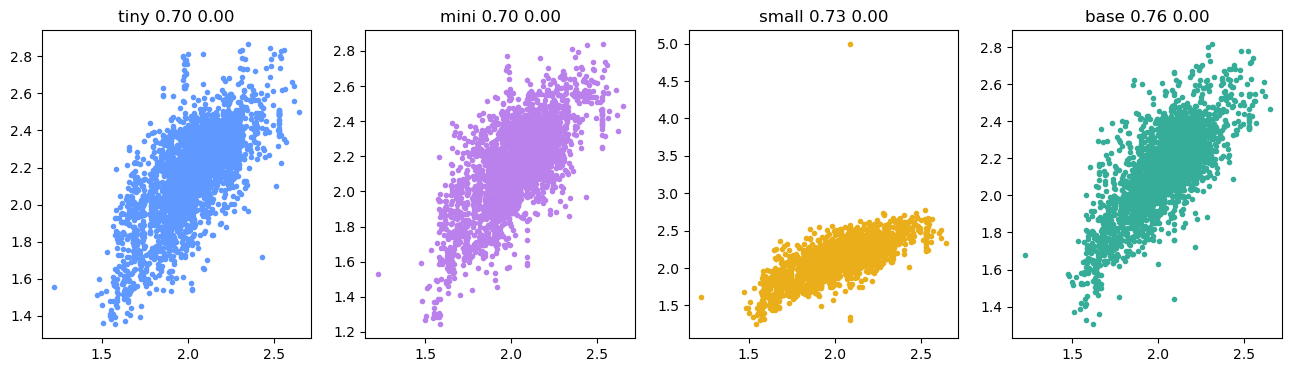

In [37]:

from scipy.stats import pearsonr
from dysts.analysis import gp_dim

equation_names = get_attractor_list()
fig, axes = plt.subplots(1, 4, figsize=(16, 4))  # 1 row, 4 columns

for i, model_size in enumerate(model_sizes):
    print(model_size, flush=True)
    all_all_corr_true, all_all_corr_pred = list(), list()
    for equation_name in equation_names:
        try:
            all_traj_true = np.load(BASE_DIR + f"forecast_{equation_name}_granularity{granularity}_true_chronos.npy", allow_pickle=True)
            all_traj_forecasts = np.load(BASE_DIR + 
                f"forecast_{equation_name}_{model_size}_granularity{granularity}.npy", allow_pickle=True
            )
            all_traces[equation_name] = dict()
        except:
            print(f"Skipping {equation_name} {model_size}", flush=True)
            continue
        
        all_corr_true, all_corr_pred = list(), list()
        ## Loop over all intial conditions, accounting for the fact that some predictions may not have been computed
        for traj_pred, traj_true in zip(
            all_traj_forecasts.squeeze(), 
            all_traj_true[:len(all_traj_forecasts)].squeeze()
        ):
            corr_true, corr_pred = gp_dim(traj_true), gp_dim(traj_pred)
            all_corr_true.append(corr_true)
            all_corr_pred.append(corr_pred)
        all_corr_true, all_corr_pred = np.array(all_corr_true), np.array(all_corr_pred)
        all_all_corr_true.append(all_corr_true)
        all_all_corr_pred.append(all_corr_pred)
    # break
    
    corr = pearsonr(np.hstack(all_all_corr_true), np.hstack(all_all_corr_pred))
    print(corr.statistic, corr.pvalue)




    axes[i].plot(
        np.hstack(all_all_corr_true), 
        np.hstack(all_all_corr_pred),
        ".",
        color=all_colors[i]
    )
    axes[i].set_title(f"{model_size} {corr.statistic:.2f} {corr.pvalue:.2f}")




### Correlation between forecast and invariant properties of different dynamical systems

In [14]:

## Load the invariant properties for each individual system
import dysts.flows as dfl
all_lyap = list()
all_corrdim = list()
all_kydim = list()
all_acc = list()
for equation_name in all_traces:
    

    spec = np.array(getattr(dfl, equation_name)().lyapunov_spectrum_estimated)
    try:
        all_lyap.append(np.sum(spec[spec > 0]))
    except:
        all_lyap.append(getattr(dfl, equation_name)().maximum_lyapunov_estimated)
    # all_lyap.append(getattr(dfl, equation_name)().maximum_lyapunov_estimated)
    all_corrdim.append(getattr(dfl, equation_name)().correlation_dimension)
    all_kydim.append(getattr(dfl, equation_name)().kaplan_yorke_dimension)
    

Text(0, 0.5, 'Correlation with Correlation Dimension')

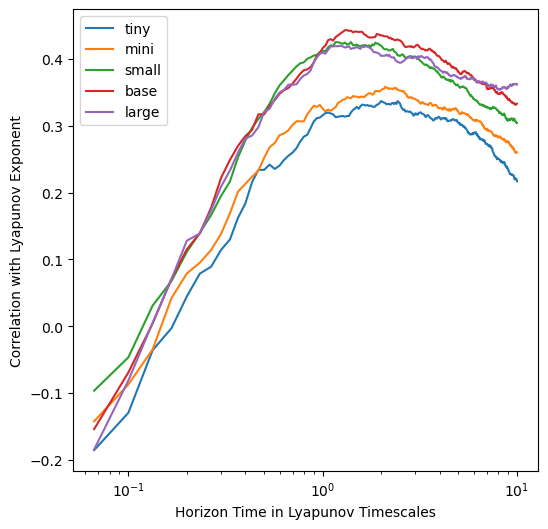

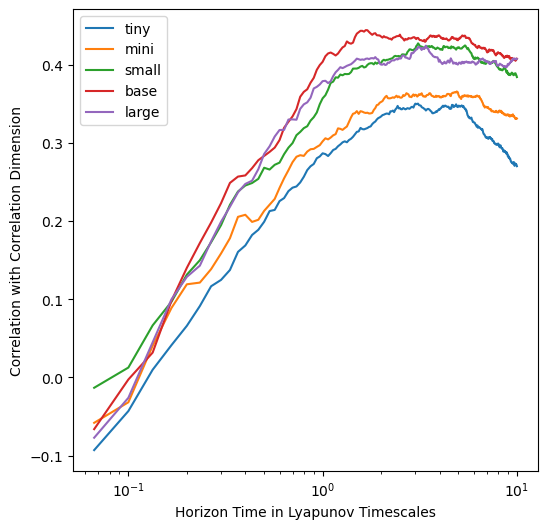

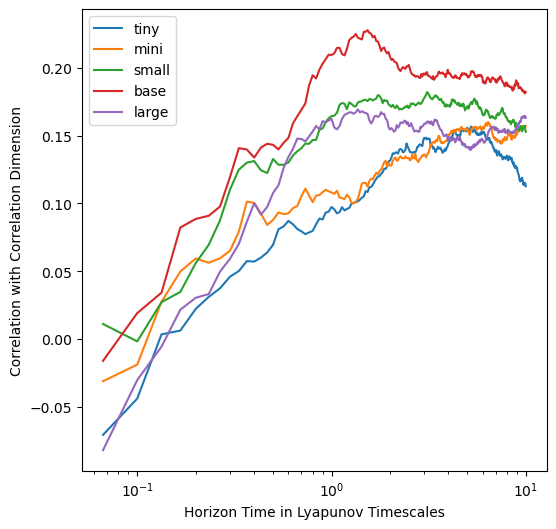

In [15]:
from scipy.stats import spearmanr

## Load the invariant properties for each individual system
plt.figure(figsize=(6, 6))
for model_size in model_sizes:
    all_corr_lyap = list()
    nt = len(all_traces[equation_name][model_size])
    for i in range(nt):
        all_acc = list()
        for equation_name in all_traces:
            all_acc.append(all_traces[equation_name][model_size][i])
        corr = spearmanr(all_lyap, all_acc).correlation
        all_corr_lyap.append(corr)
    xvals = np.arange(1, 1 + len(all_corr_lyap)) / granularity
    plt.semilogx(xvals, all_corr_lyap, label=model_size)
plt.legend()
plt.xlabel("Horizon Time in Lyapunov Timescales")
plt.ylabel("Correlation with Lyapunov Exponent")

plt.figure(figsize=(6, 6))
for model_size in model_sizes:
    all_corr_corrdim = list()
    nt = len(all_traces[equation_name][model_size])
    for i in range(nt):
        all_acc = list()
        for equation_name in all_traces:
            all_acc.append(all_traces[equation_name][model_size][i])
        corr = spearmanr(all_corrdim, all_acc).correlation
        all_corr_corrdim.append(corr)
    xvals = np.arange(1, 1 + len(all_corr_lyap)) / granularity
    xvals = np.arange(1, 1 + len(all_corr_lyap)) / granularity
    plt.semilogx(xvals, all_corr_corrdim, label=model_size)
plt.legend()
plt.xlabel("Horizon Time in Lyapunov Timescales")
plt.ylabel("Correlation with Correlation Dimension")


plt.figure(figsize=(6, 6))
for model_size in model_sizes:
    all_corr_corrdim = list()
    nt = len(all_traces[equation_name][model_size])
    for i in range(nt):
        all_acc = list()
        for equation_name in all_traces:
            all_acc.append(all_traces[equation_name][model_size][i])
        corr = spearmanr(all_kydim, all_acc).correlation
        all_corr_corrdim.append(corr)
    xvals = np.arange(1, 1 + len(all_corr_lyap)) / granularity
    xvals = np.arange(1, 1 + len(all_corr_lyap)) / granularity
    plt.semilogx(xvals, all_corr_corrdim, label=model_size)
plt.legend()
plt.xlabel("Horizon Time in Lyapunov Timescales")
plt.ylabel("Correlation with Correlation Dimension")



In [277]:
pp = f"./trained/forecast_{"Aizawa"}_{"Linear"}_granularity{pts_per_period}.npy"
all_traj_forecasts = np.load(
                pp, allow_pickle=True
            )

FileNotFoundError: [Errno 2] No such file or directory: './trained/forecast_Aizawa_Linear_granularity30.npy'

# Baseline models

In [82]:
import glob
from dysts.base import get_attractor_list

pts_per_period = 30
model_names = np.array(["Linear", "LSTM", "NBEATS", "NVAR", "TiDE", "Transformer"])
# model_names = ["NVAR", "LSTM", "TiDE"]
all_traces  = dict()

DIRNAME = "./trained/darts_benchmarks_granularity_30"

import glob
import os
import re
all_files = glob.glob(os.path.join(DIRNAME, f"forecast*.npy"))
equation_names = np.unique([re.search(r'forecast_(.*?)_', file_name).group(1) for file_name in all_files])
print(len(equation_names))

# equation_names = get_attractor_list()
# for equation_name in ["Lorenz", "Aizawa", "Arneodo", "ArnoldBeltrami", "AnishchenkoAstakhov", "Rossler"]:
for equation_name in equation_names:
    
    all_traces[equation_name] = dict()
    for model_name in model_names:
        try:
            # "/Users/william/program_repos/dysts_data/benchmark_results/trained/darts_benchmarks_granularity_30/forecast_Aizawa_granularity_30_true_dysts.npy"
            traj_test_forecast = np.load(f"./trained/darts_benchmarks_granularity_30/forecast_{equation_name}_granularity_{pts_per_period}_true_dysts.npy", allow_pickle=True)
            all_traj_forecasts = np.load(
                f"./trained/darts_benchmarks_granularity_30/forecast_{equation_name}_{model_name}_granularity{pts_per_period}.npy", allow_pickle=True
            )
        except Exception as e:
            print(e)
            print(f"Skipping {equation_name} {model_name}", flush=True)
            # all_traces.pop(equation_name, None)
            continue
        
        # print(equation_name, flush=True)

        all_smape_rolling = list()
        for traj_pred, traj_true in zip(all_traj_forecasts, traj_test_forecast):
            all_smape = list()
            for i in range(traj_pred.shape[1]):
                smape_val = smape_rolling(traj_pred[:, i], traj_true[:, i])
                if np.all(np.isnan(smape_val)):
                    pass
                else:
                    smape_val[np.isnan(smape_val)] = 0
                all_smape.append(smape_val)
            all_smape_rolling.append(all_smape)
        all_smape_rolling = np.array(all_smape_rolling)

        all_traces[equation_name][model_name] = np.nanmedian(np.nanmean(np.copy(all_smape_rolling), axis=1), axis=0)


104
[Errno 2] No such file or directory: './trained/darts_benchmarks_granularity_30/forecast_Bouali2_Linear_granularity30.npy'
Skipping Bouali2 Linear
[Errno 2] No such file or directory: './trained/darts_benchmarks_granularity_30/forecast_Bouali2_LSTM_granularity30.npy'
Skipping Bouali2 LSTM
[Errno 2] No such file or directory: './trained/darts_benchmarks_granularity_30/forecast_Bouali2_Transformer_granularity30.npy'
Skipping Bouali2 Transformer
[Errno 2] No such file or directory: './trained/darts_benchmarks_granularity_30/forecast_BurkeShaw_Linear_granularity30.npy'
Skipping BurkeShaw Linear
[Errno 2] No such file or directory: './trained/darts_benchmarks_granularity_30/forecast_BurkeShaw_LSTM_granularity30.npy'
Skipping BurkeShaw LSTM
[Errno 2] No such file or directory: './trained/darts_benchmarks_granularity_30/forecast_BurkeShaw_Transformer_granularity30.npy'
Skipping BurkeShaw Transformer
[Errno 2] No such file or directory: './trained/darts_benchmarks_granularity_30/forecast_C

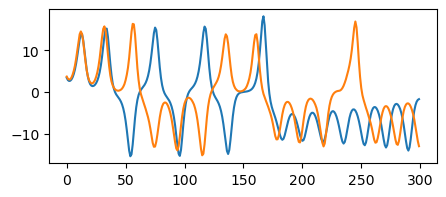

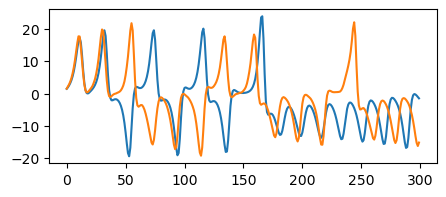

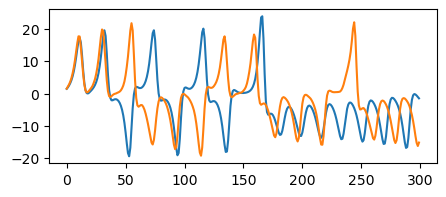

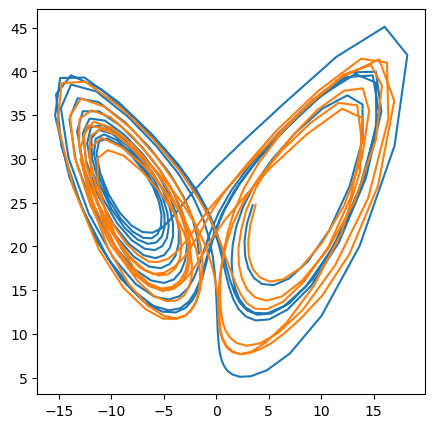

In [83]:
equation_name = "Lorenz"
model_name = "NBEATS"

traj_test_forecast = np.load(f"./trained/darts_benchmarks_granularity_30/forecast_{equation_name}_granularity_{pts_per_period}_true_dysts.npy", allow_pickle=True)
all_traj_forecasts = np.load(
    f"./trained/darts_benchmarks_granularity_30/forecast_{equation_name}_{model_name}_granularity{pts_per_period}.npy", allow_pickle=True
)

plt.figure(figsize=(5, 2))
plt.plot(traj_test_forecast[0, :, 0])
plt.plot(all_traj_forecasts[0, :, 0])

plt.figure(figsize=(5, 2))
plt.plot(traj_test_forecast[0, :, 1])
plt.plot(all_traj_forecasts[0, :, 1])

plt.figure(figsize=(5, 2))
plt.plot(traj_test_forecast[0, :, 1])
plt.plot(all_traj_forecasts[0, :, 1])


plt.figure(figsize=(5, 5))
plt.plot(traj_test_forecast[0, :, 0], traj_test_forecast[0, :, 2])
plt.plot(all_traj_forecasts[0, :, 0], all_traj_forecasts[0, :, 2])

['LSTM' 'Transformer' 'NVAR' 'Linear' 'TiDE' 'NBEATS']
LSTM 76
Transformer 95
NVAR 104
Linear 94
TiDE 100
NBEATS 102


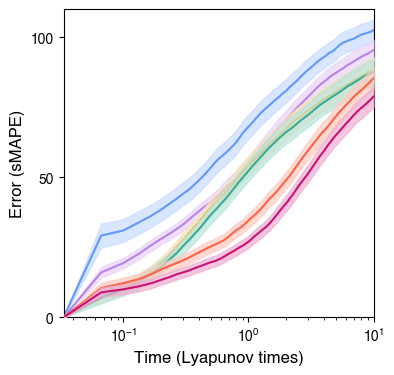

In [91]:

import degas as dg
smape_threshold = 30
all_all_vals, all_all_prediction_horizons = list(), list()
all_vals_dict, all_predictions_dict = dict(), dict()
for model_name in model_names:
    all_vals = list()
    all_horizons = list()
    for equation_name in all_traces.keys():

        try:
            ## Save traces
            vals = all_traces[equation_name][model_name]
            all_vals.append(vals)

            ## Save prediction horizon
            exceed_times = np.where(vals > smape_threshold)[0]
            if len(exceed_times) == 0:
                tind = len(vals)
            else:
                tind = exceed_times[0]
            all_horizons.append(tind)
        except:
            pass

    all_vals_dict[model_name] = np.array(all_vals)
    all_predictions_dict[model_name] = np.array(all_horizons)
    # all_all_vals.append(np.array(all_vals))
    # all_all_prediction_horizons.append(np.array(all_horizons))
# all_all_vals = np.array(all_all_vals)
# all_all_prediction_horizons = np.array(all_all_prediction_horizons)
xvals = np.arange(1, all_vals_dict[model_names[0]].shape[-1] + 1) / pts_per_period

## Scale by granularity
all_predictions_dict = {model_name: all_predictions_dict[model_name] / pts_per_period for model_name in all_predictions_dict}

sort_order = np.argsort([np.median(all_predictions_dict[model_name]) for model_name in all_predictions_dict])
print(model_names[sort_order])

all_colors = np.array([dg.blue, dg.lighter(dg.purple), dg.orange, dg.turquoise, dg.red, dg.magenta])#[np.argsort(sort_order)]

# import degas as dg

plt.figure(figsize=(4, 4))
for i, model_name in enumerate(model_names[sort_order]):
    n_sys = all_vals_dict[model_name].shape[0]
    print(model_name, n_sys)
    # mv_vals = np.mean(all_all_vals, axis=1)[i]
    # std_vals = np.std(all_all_vals, axis=1)[i]
    mv_vals = np.mean(all_vals_dict[model_name], axis=0)
    std_vals = np.std(all_vals_dict[model_name], axis=0)
    

    # plt.plot(mv_vals, label=model_size)
    plt.semilogx()
    # dg.plot_err(mv_vals, std_vals / np.sqrt(n_sys) / 2, x=xvals, color=all_colors[i], label=model_size)
    dg.plot_err(mv_vals, std_vals / np.sqrt(n_sys) / 1, x=xvals, color=all_colors[i], label=model_name, zorder=10*i, fill_kwargs={"alpha": 0.7})

plt.xlabel("Time (Lyapunov times)", fontname="Helvetica", fontsize=12)
plt.ylabel("Error (sMAPE)", fontname="Helvetica", fontsize=12)
# plt.legend(fontsize=10, frameon=False, prop={'family':"Helvetica", 'size':12})
# plt.legend()
plt.xlim(np.min(xvals), np.max(xvals))
plt.ylim(0, 110)
plt.yticks([0, 50, 100])
# set font name of x-axis labels
plt.xticks(fontname="Helvetica")
plt.yticks(fontname="Helvetica")



# dg.better_savefig("./fig_resources/baseline_traces.png", dpi=300)

(102, 300)

/var/folders/xt/9wdl4pmx26gf_qytq8_d528c0000gq/T/ipykernel_14508/303072374.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(


(array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.]),
 [Text(0, -4.0, '$10^{-4}$'),
  Text(0, -3.0, '$10^{-3}$'),
  Text(0, -2.0, '$10^{-2}$'),
  Text(0, -1.0, '$10^{-1}$'),
  Text(0, 0.0, '$10^{0}$'),
  Text(0, 1.0, '$10^{1}$'),
  Text(0, 2.0, '$10^{2}$'),
  Text(0, 3.0, '$10^{3}$')])

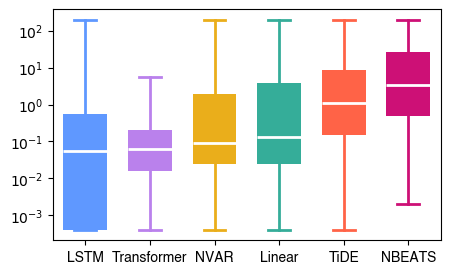

In [127]:


plt.figure(figsize=(5, 3))

    
box = plt.boxplot(
    [np.log(all_predictions_dict[model_name]) for model_name in model_names[sort_order]], 
    labels=model_names[sort_order], 
    patch_artist=True, showfliers=False, 
    widths=0.34, positions=np.arange(len(model_names))/2
)

plt.xlim(-0.25, 2.75)
for patch, color in zip(box['boxes'], all_colors):
    patch.set_facecolor(color)
    patch.set_linewidth(0)
    patch.set_edgecolor(color)

for median, color in zip(box['medians'], all_colors):
    median.set_color("w")
    median.set_linewidth(2)

for i, (cap, whisker) in enumerate(zip(box['caps'], box['whiskers'])):
    color = all_colors[i // 2]
    whisker.set_color(color)
    cap.set_color(color)
    whisker.set_linewidth(2)
    cap.set_linewidth(2)

# log y-axis
# plt.yscale('log')
# plt.yticks([-3, 0, 3]) 
# custim scientific notation for y-axis ticks
# plt.gca().yaxis.get_major_formatter().set_powerlimits((0, 0))

# from matplotlib.ticker import FuncFormatter
# def custom_formatter(x, pos):
#     # base 10 scientific notation
#     exponent = int(x)
#     return f"$10^{exponent}$"

# plt.gca().set_xticklabels(
#     [f"$10^{{{int(y)}}}$" for y in plt.gca().get_xticks()], 
#     fontdict={
#     "family": 'sans-serif', 
#     "fontname": "Helvetica",
#     }
# )




scientific_ticks(axis='y', fontdict={"family": 'sans-serif', "fontname": "Helvetica"})

# Set the formatter for the x-axis
# plt.gca().yaxis.set_major_formatter(FuncFormatter(custom_formatter))


plt.xticks(fontname="Helvetica")
plt.yticks(fontname="Helvetica")

# plt.xlabel("Model")
# plt.ylabel("Prediction Horizon (Lyapunov times)")
# plt.title(f"Prediction Horizon for SMAPE > {smape_threshold}")

# dg.better_savefig("./fig_resources/baselines_legend.png", dpi=300)


Linear
Skipping Bouali2 large
Skipping BurkeShaw large
Skipping ForcedVanDerPol large
Skipping GlycolyticOscillation large
Skipping IkedaDelay large
Skipping MacArthur large
Skipping MackeyGlass large
Skipping MultiChua large
Skipping PanXuZhou large
Skipping PehlivanWei large
Skipping PiecewiseCircuit large
Skipping Qi large
Skipping QiChen large
Skipping RabinovichFabrikant large
Skipping RayleighBenard large
Skipping RikitakeDynamo large
Skipping Rucklidge large
Skipping Sakarya large
Skipping SaltonSea large
Skipping SanUmSrisuchinwong large
Skipping ScrollDelay large
Skipping ShimizuMorioka large
Skipping SprottA large
Skipping SprottB large
Skipping SprottC large
Skipping SprottD large
Skipping SprottDelay large
Skipping SprottE large
Skipping SprottF large
Skipping SprottG large
Skipping SprottH large
Skipping SprottI large
Skipping SprottJ large
Skipping SprottJerk large
Skipping SprottK large
Skipping SprottL large
Skipping SprottM large
Skipping SprottMore large
Skipping Spro

/Users/william/micromamba/envs/dysts_benchmarks/lib/python3.12/site-packages/dysts/analysis.py:138: RuntimeWarning: divide by zero encountered in scalar divide
  ahat = 1 + n / np.sum(np.log(data / xmin), axis=0)


Skipping MacArthur large
Skipping MackeyGlass large
Skipping MultiChua large
Skipping NoseHoover large
Skipping PanXuZhou large
Skipping PehlivanWei large
Skipping PiecewiseCircuit large
Skipping Qi large
Skipping QiChen large
Skipping RabinovichFabrikant large
Skipping RayleighBenard large
Skipping RikitakeDynamo large
Skipping Rossler large
Skipping Rucklidge large
Skipping Sakarya large
Skipping SaltonSea large
Skipping SanUmSrisuchinwong large
Skipping ScrollDelay large
Skipping ShimizuMorioka large
Skipping SprottA large
Skipping SprottB large
Skipping SprottC large
Skipping SprottD large
Skipping SprottDelay large
Skipping SprottE large
Skipping SprottF large
Skipping SprottG large
Skipping SprottH large
Skipping SprottI large
Skipping SprottJ large
Skipping SprottJerk large
Skipping SprottK large
Skipping SprottL large
Skipping SprottM large
Skipping SprottMore large
Skipping SprottN large
Skipping SprottO large
Skipping SprottP large
Skipping SprottQ large
Skipping SprottR larg

/Users/william/micromamba/envs/dysts_benchmarks/lib/python3.12/site-packages/scipy/stats/_stats_py.py:4832: RuntimeWarning: invalid value encountered in subtract
  ym = y.astype(dtype) - ymean


ValueError: array must not contain infs or NaNs

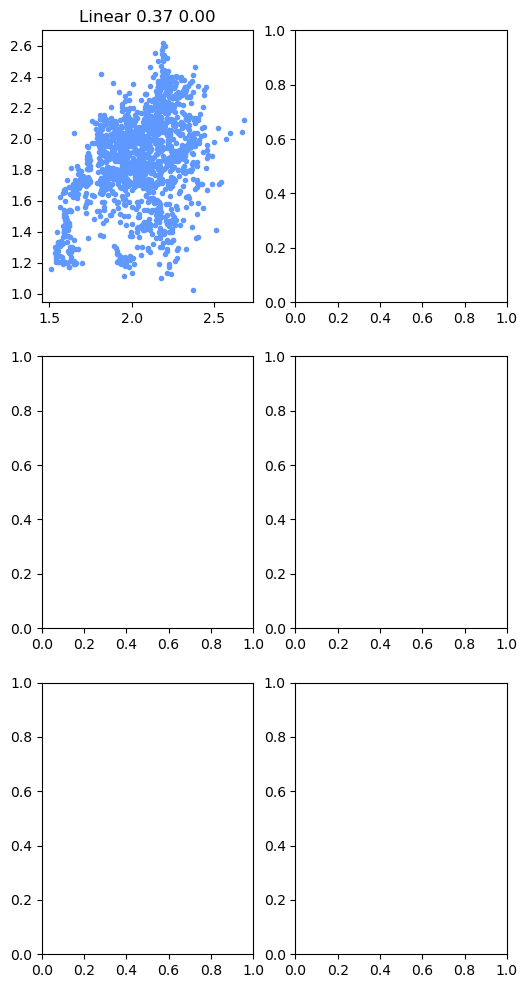

In [79]:

from scipy.stats import pearsonr
from dysts.analysis import gp_dim

equation_names = get_attractor_list()
fig, axes = plt.subplots(3, 2, figsize=(6, 12))  # 1 row, 5 columns
axes = axes.flatten()

for i, model_name in enumerate(model_names):
    print(model_name, flush=True)
    all_all_corr_true, all_all_corr_pred = list(), list()
    for equation_name in equation_names:
        try:
            all_traj_true = np.load(f"./trained/darts_benchmarks_granularity_30/forecast_{equation_name}_granularity_{pts_per_period}_true_dysts.npy", allow_pickle=True)
            all_traj_forecasts = np.load(
                f"./trained/darts_benchmarks_granularity_30/forecast_{equation_name}_{model_name}_granularity{pts_per_period}.npy", allow_pickle=True
            )
            all_traces[equation_name] = dict()
        except:
            print(f"Skipping {equation_name} {model_size}", flush=True)
            continue
        
        all_corr_true, all_corr_pred = list(), list()
        ## Loop over all intial conditions, accounting for the fact that some predictions may not have been computed
        for traj_pred, traj_true in zip(
            all_traj_forecasts.squeeze(), 
            all_traj_true[:len(all_traj_forecasts)].squeeze()
        ):
            corr_true, corr_pred = gp_dim(traj_true), gp_dim(traj_pred)
            all_corr_true.append(corr_true)
            all_corr_pred.append(corr_pred)
        all_corr_true, all_corr_pred = np.array(all_corr_true), np.array(all_corr_pred)
        all_all_corr_true.append(all_corr_true)
        all_all_corr_pred.append(all_corr_pred)
    # break
    
    corr = pearsonr(np.hstack(all_all_corr_true), np.hstack(all_all_corr_pred))
    print(corr.statistic, corr.pvalue)


    axes[i].plot(
        np.hstack(all_all_corr_true), 
        np.hstack(all_all_corr_pred),
        ".",
        color=all_colors[i]
    )
    axes[i].set_title(f"{model_name} {corr.statistic:.2f} {corr.pvalue:.2f}")




## Statistical comparison

Wilcoxon test the valid prediction times (VPT) of the baseline models versus the zero-shot models